In [46]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Demostration

#### Functions

In [2]:
"""
lennardJones = a/r^12 - b/r^6;
force = -D[lennardJones, 
    r]; (*La force est la derivée (en 1D) du potentiel*)
"""

def lennardJones(a, b):
    return lambda r: a / pow(r, 12) - b / pow(r, 6)

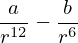

In [3]:
a, b, r = symbols("a b r")
init_printing(use_unicode=True)

lennardJones = a/r**12 - b/r**6
lennardJones

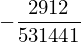

In [4]:
force = -lennardJones.diff(r)
forceres = force.subs({a:1, b:2, r:3})
forceres

In [5]:
"""
equationDistanceMinimum = (force /. r -> rMin) == 0
equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
criticalPointSolutions = 
Solve[{equationDistanceMinimum, equationEnergieMinimum}, {a, b}];

"""

'\nequationDistanceMinimum = (force /. r -> rMin) == 0\nequationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;\ncriticalPointSolutions = \nSolve[{equationDistanceMinimum, equationEnergieMinimum}, {a, b}];\n\n'

In [6]:
rMin = symbols('rMin')

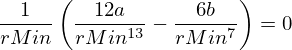

In [7]:
equationDistanceMinimum = Eq(force.subs({r: rMin}) / rMin, 0)
equationDistanceMinimum

In [8]:
#equationEnergieMinimum = (lennardJones /. r -> rMin) == -eMin;
eMin = symbols('eMin')
equationEnergieMinimum = Eq(lennardJones.subs({r:rMin}), -eMin)

In [9]:
criticalPoints = solve([equationDistanceMinimum, equationEnergieMinimum], a, b)
criticalPoints

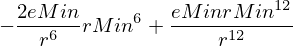

In [10]:
lennardJonesCritical = lennardJones.subs(criticalPoints)
lennardJonesCritical

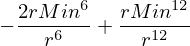

In [11]:
lennardJonesScaled = expand(lennardJonesCritical / eMin)
lennardJonesScaled

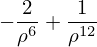

In [12]:
rho = symbols('rho')
energy = expand(lennardJonesScaled.subs({r: rho * rMin}))
energy

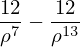

In [13]:
forceScaled = expand(energy.diff(rho))
forceScaled

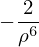

In [14]:
energyAttractive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
energyAttractive

In [15]:
energyRepulsive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
energyRepulsive

In [16]:
forceScaledAttractive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
forceScaledAttractive

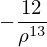

In [17]:
forceScaledRepulsive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
forceScaledRepulsive

#### Graphics

In [18]:
from mpmath import *

In [19]:
parabolaApproximation = series(energy, rho, n=3, x0=1).removeO()
parabolaApproximation

In [20]:
cubicApproximation = series(energy, rho, n=4, x0=1).removeO()
cubicApproximation

## Oscillations for the approximation 

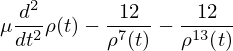

In [43]:
t, mu = symbols("t mu")
fEqualsMA = mu*rho(t).diff(t,2)-12/(rho(t)**13)-12/(rho(t)**7)
fEqualsMA

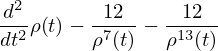

In [50]:
charateristicPeriod = 2*np.pi/np.sqrt(72)
fEqualsMA = fEqualsMA.subs({mu:1})
fEqualsMA

### numSol

In [65]:
import scipy.integrate as integrate

def fEqualsMA(rho_, t):
    rho, rho_prime = rho_
    return [rho_prime, 12/(rho**13)+12/(rho**7)]

t = np.linspace(0, 10*charateristicPeriod, 2000)
rho_init = [1.1, 0]
numSol = integrate.odeint(fEqualsMA, rho_init, t)

### numericalSolutionFromVariableStartingPoint

In [68]:
def numericalSolutionFromVariableStartingPoint(initialValue):
    t = np.linspace(0, 40, 2000)
    rho_init = [initialValue, 0]
    return integrate.odeint(fEqualsMA, rho_init, t)
    
initialValue = 1.2
numSol = numericalSolutionFromVariableStartingPoint(initialValue)